In [291]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/diamond \
     --filename=out.log --output=../data/diamond-ref-kpts.json

In [292]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Desktop/fftisdf-embedding/fig/")
assert figpath.exists()

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data = None
with open('../data/diamond-ref-kpts.json', 'r') as f:
    data = json.load(f)

kcalmol_to_hartree = 1 / 627.5
color = {'FFTISDF': 'b', 'GDF': 'r', 'RSDF': 'r', 'FFTDF': 'g'}

for k, v in data.items():
    for kk, vv in v.items():
        print(kk, vv)
    break

method fftdf-80
basis cc-pvdz
natm 2.0
nkpt 48.0
nao 26.0
time_build_df 0.0
naux 18522.0
time_krks 4.39
ene_krks -11.36478173


[]
[] []


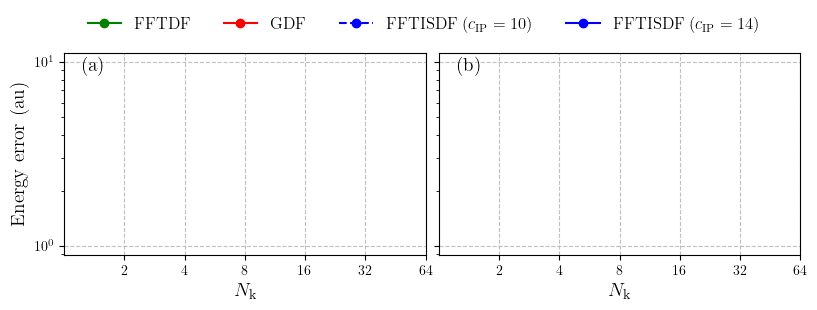

In [ ]:
def get_xy_from_keyword(method, keyword):
    d = {}
    for k, v in data.items():
        x = v.get("nkpt")
        y = v.get(keyword)
        natm = v.get("natm")

        m = v.get("method")
        if not m == method:
            continue

        if x is not None and y is not None and natm is not None:
            d[x] = y / natm

    return d

fig, ax = plt.subplots(1, 2, figsize=(8, 2.5), sharex=True, sharey=True)
fontsize = 14

k0 = "fftdf-120"
k1 = "fftdf-80"
k2 = "fftisdf-80-10"
k3 = "fftisdf-80-12"
k4 = "gdf-2.0"

d0 = get_xy_from_keyword(k0, "ene_krhf")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

d1 = get_xy_from_keyword(k1, "ene_krhf")
y1 = np.array([d1.get(x, np.nan) for x in xx])

d2 = get_xy_from_keyword(k2, "ene_krhf")
y2 = np.array([d2.get(x, np.nan) for x in xx])

d3 = get_xy_from_keyword(k3, "ene_krhf")
y3 = np.array([d3.get(x, np.nan) for x in xx])

d4 = get_xy_from_keyword(k4, "ene_krhf")
y4 = np.array([d4.get(x, np.nan) for x in xx])

ax[0].semilogy(np.log2(xx), abs(y0 - y1) + 1e-6, label="FFTDF", color=color["FFTDF"], marker="o")
ax[0].semilogy(np.log2(xx), abs(y0 - y4) + 1e-6, label=r"GDF", color=color["GDF"], marker="o")
ax[0].semilogy(np.log2(xx), abs(y0 - y2) + 1e-6, label=r"FFTISDF ($c_\mathrm{IP} = 10$)", color=color["FFTISDF"], marker="o", linestyle="--")
ax[0].semilogy(np.log2(xx), abs(y0 - y3) + 1e-6, label=r"FFTISDF ($c_\mathrm{IP} = 14$)", color=color["FFTISDF"], marker="o")


d0 = get_xy_from_keyword(k0, "ene_kmp2")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

d1 = get_xy_from_keyword(k1, "ene_kmp2")
y1 = np.array([d1.get(x, np.nan) for x in xx])

d2 = get_xy_from_keyword(k2, "ene_kmp2")
y2 = np.array([d2.get(x, np.nan) for x in xx])

d3 = get_xy_from_keyword(k3, "ene_kmp2")
y3 = np.array([d3.get(x, np.nan) for x in xx])

d4 = get_xy_from_keyword(k4, "ene_kmp2")
y4 = np.array([d4.get(x, np.nan) for x in xx])

ax[1].semilogy(np.log2(xx), abs(y0 - y1) + 1e-6, color=color["FFTDF"], marker="o")
ax[1].semilogy(np.log2(xx), abs(y0 - y2) + 1e-6, color=color["FFTISDF"], marker="o", linestyle="--")
ax[1].semilogy(np.log2(xx), abs(y0 - y3) + 1e-6, color=color["FFTISDF"], marker="o")
ax[1].semilogy(np.log2(xx), abs(y0 - y4) + 1e-6, color=color["GDF"], marker="o")
# ax[1].legend()

ax[0].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax[1].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax[0].set_xlim(0, 6)
ax[0].set_xticks([1, 2, 3, 4, 5, 6])
ax[0].set_xticklabels([2, 4, 8, 16, 32, 64])

ax[0].set_ylabel("Energy error (au)", fontsize=fontsize)

ax[0].grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)
ax[1].grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)

ax[0].text(
    0.05, 0.91,
    "(a)",
    fontsize=fontsize,
    transform=ax[0].transAxes,
    ha="left",
)

ax[1].text(
    0.05, 0.91,
    "(b)",
    fontsize=fontsize,
    transform=ax[1].transAxes,
    ha="left",
)

fig.legend(
    fontsize=fontsize - 2,
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0.08, 1.20),
    ncol=4,
)

fig.tight_layout(
    pad=0.1,
)

fig.savefig(figpath / "ref-kpts-diamond.pdf", bbox_inches="tight", dpi=300)

In [294]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/co2 \
     --filename=out.log --output=../data/co2-ref-kpts.json

data = None
with open('../data/co2-ref-kpts.json', 'r') as f:
    data = json.load(f)

kcalmol_to_hartree = 1 / 627.5
color = {'FFTISDF': 'b', 'GDF': 'r', 'RSDF': 'r', 'FFTDF': 'g'}

for k, v in data.items():
    for kk, vv in v.items():
        print(kk, vv)
    break

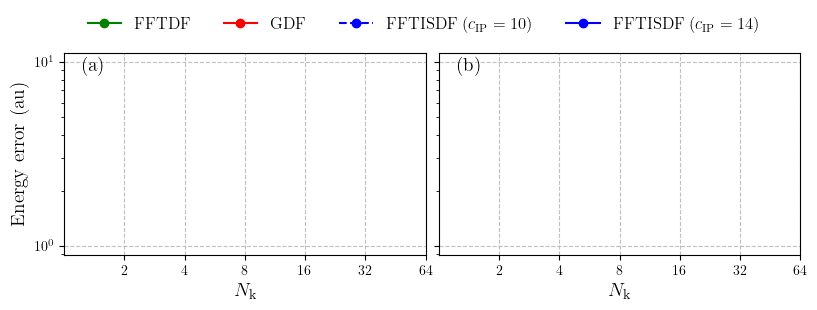

In [295]:
def get_xy_from_keyword(method, keyword):
    d = {}
    for k, v in data.items():
        x = v.get("nkpt")
        y = v.get(keyword)
        natm = v.get("natm")

        m = v.get("method")
        if not m == method:
            continue

        if x is not None and y is not None and natm is not None:
            d[x] = y / natm

    return d

fig, ax = plt.subplots(1, 2, figsize=(8, 2.5), sharex=True, sharey=True)
fontsize = 14

d0 = get_xy_from_keyword("fftdf-100", "ene_krhf")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

k1 = "fftdf-80"
d1 = get_xy_from_keyword(k1, "ene_krhf")
y1 = np.array([d1.get(x, np.nan) for x in xx])

k2 = "fftisdf-80-10"
d2 = get_xy_from_keyword(k2, "ene_krhf")
y2 = np.array([d2.get(x, np.nan) for x in xx])

k3 = "fftisdf-80-14"
d3 = get_xy_from_keyword(k3, "ene_krhf")
y3 = np.array([d3.get(x, np.nan) for x in xx])

k4 = "gdf-2.0"
d4 = get_xy_from_keyword(k4, "ene_krhf")
y4 = np.array([d4.get(x, np.nan) for x in xx])

ax[0].semilogy(np.log2(xx), abs(y0 - y1) + 1e-6, label="FFTDF", color=color["FFTDF"], marker="o")
ax[0].semilogy(np.log2(xx), abs(y0 - y4) + 1e-6, label=r"GDF", color=color["GDF"], marker="o")
ax[0].semilogy(np.log2(xx), abs(y0 - y2) + 1e-6, label=r"FFTISDF ($c_\mathrm{IP} = 10$)", color=color["FFTISDF"], marker="o", linestyle="--")
ax[0].semilogy(np.log2(xx), abs(y0 - y3) + 1e-6, label=r"FFTISDF ($c_\mathrm{IP} = 14$)", color=color["FFTISDF"], marker="o")


d0 = get_xy_from_keyword("fftdf-100", "ene_kmp2")
xx = np.array(list(d0.keys()))
y0 = np.array(list(d0.values()))
ix = np.argsort(xx)
xx = xx[ix]
y0 = y0[ix]

d1 = get_xy_from_keyword(k1, "ene_kmp2")
y1 = np.array([d1.get(x, np.nan) for x in xx])

d2 = get_xy_from_keyword(k2, "ene_kmp2")
y2 = np.array([d2.get(x, np.nan) for x in xx])

d3 = get_xy_from_keyword(k3, "ene_kmp2")
y3 = np.array([d3.get(x, np.nan) for x in xx])

d4 = get_xy_from_keyword(k4, "ene_kmp2")
y4 = np.array([d4.get(x, np.nan) for x in xx])

ax[1].semilogy(np.log2(xx), abs(y0 - y1) + 1e-6, color=color["FFTDF"], marker="o")
ax[1].semilogy(np.log2(xx), abs(y0 - y2) + 1e-6, color=color["FFTISDF"], marker="o", linestyle="--")
ax[1].semilogy(np.log2(xx), abs(y0 - y3) + 1e-6, color=color["FFTISDF"], marker="o")
ax[1].semilogy(np.log2(xx), abs(y0 - y4) + 1e-6, color=color["GDF"], marker="o")
# ax[1].legend()

ax[0].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax[1].set_xlabel(r"$N_{\mathrm{k}}$", fontsize=fontsize)
ax[0].set_xlim(0, 6)
ax[0].set_xticks([1, 2, 3, 4, 5, 6])
ax[0].set_xticklabels([2, 4, 8, 16, 32, 64])

ax[0].set_ylabel("Energy error (au)", fontsize=fontsize)

ax[0].grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)
ax[1].grid(True, which="major", ls="--", alpha=0.8, linewidth=0.8)

ax[0].text(
    0.05, 0.91,
    "(a)",
    fontsize=fontsize,
    transform=ax[0].transAxes,
    ha="left",
)

ax[1].text(
    0.05, 0.91,
    "(b)",
    fontsize=fontsize,
    transform=ax[1].transAxes,
    ha="left",
)

fig.legend(
    fontsize=fontsize - 2,
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0.08, 1.20),
    ncol=4,
)

fig.tight_layout(
    pad=0.1,
)

fig.savefig(figpath / "ref-kpts-co2.pdf", bbox_inches="tight", dpi=300)